In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, color, exposure
import cv2
import pandas as pd
import numpy as np
from numpy import ndarray
import seaborn as sns
import time
import matplotlib.pyplot as plt
import pandas as pd
import imutils
%matplotlib inline

%matplotlib inline

In [2]:
hog_pos = pd.DataFrame()
hog_neg = pd.DataFrame()

count=0

for i in range(501):
    
    if count <= 498:
        path = "data/TrainImages/pos-" + str(count) + ".pgm"
    elif count >498:
        path = "data/TrainImages/pos-" + str(count) + ".png"
    
    image = color.rgb2gray(cv2.imread(path))
    
    fd, hog_image = hog(image, orientations=6, pixels_per_cell=(10, 10),
                    cells_per_block=(2, 2), visualise=True)
    
    fd = fd.reshape(1,len(fd))
    hog_pos = hog_pos.append(pd.DataFrame(fd),ignore_index=True)
    count += 1
    
hog_pos['label'] = 1

count=0

for i in range(501):
    
    if count <= 498:
        path = "data/TrainImages/neg-" + str(count) + ".pgm"
    elif count >498:
        path = "data/TrainImages/neg-" + str(count) + ".png"
    
    
    #path = "data/TrainImages/neg-" + str(count) + ".pgm"
    image = color.rgb2gray(cv2.imread(path))
    fd, hog_image = hog(image, orientations=6, pixels_per_cell=(10, 10),
                    cells_per_block=(2, 2), visualise=True)
    fd = fd.reshape(1,len(fd))
    hog_neg = hog_neg.append(pd.DataFrame(fd),ignore_index=True)
    count += 1
    
hog_neg['label'] = 0

hog_features = hog_pos.append(hog_neg,ignore_index=True)
hog_features.dropna(inplace=True)
hog_features.head()

,0,1,2,3,4,5,6,7,8,9,...,639,640,641,642,643,644,645,646,647,label
0,0.036848,0.018987,0.013296,0.097803,0.017134,0.002753,0.036653,0.020586,0.016339,0.076055,...,0.114343,0.008678,0.000000,0.016998,0.018493,0.008756,0.056437,0.007837,0.003069,1
1,0.089376,0.027752,0.018553,0.037503,0.028685,0.058594,0.025186,0.009641,0.002943,0.026005,...,0.115334,0.017002,0.000000,0.011259,0.011164,0.007983,0.054784,0.009563,0.000000,1
2,0.040186,0.031993,0.068115,0.124617,0.032076,0.009108,0.024557,0.021735,0.017901,0.064095,...,0.124040,0.023594,0.008805,0.005185,0.007465,0.010602,0.063828,0.006027,0.002682,1
3,0.071069,0.003748,0.012070,0.043693,0.019034,0.046773,0.097995,0.014718,0.035824,0.059361,...,0.131624,0.017778,0.003510,0.006017,0.012363,0.006305,0.079793,0.006927,0.000000,1
4,0.028508,0.036148,0.007844,0.053191,0.029825,0.003795,0.128637,0.016896,0.057334,0.112596,...,0.130628,0.014451,0.003779,0.014352,0.009233,0.010694,0.048994,0.004121,0.000000,1


In [3]:
image.shape

(40, 100)

# SVM Implementation

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = np.array(hog_features.ix[:,:-1])
y = np.array(hog_features['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [6]:
from sklearn.svm import SVC

In [17]:
model = SVC(C=0.1, kernel='linear', gamma='auto', coef0=0.0, 
            shrinking=True, probability=True, tol=0.001, cache_size=200, 
            class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None, 
            random_state=None)

In [18]:
model.fit(X_train,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
predictions = model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[98  2]
 [ 4 97]]


             precision    recall  f1-score   support

          0       0.96      0.98      0.97       100
          1       0.98      0.96      0.97       101

avg / total       0.97      0.97      0.97       201



# Creating Image Pyramids

In [12]:
im = cv2.imread('data/video1/images1/frame1001.jpg')
im = imutils.resize(im, width=800)

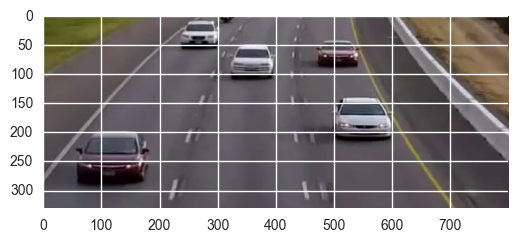

In [13]:
plt.imshow(imutils.opencv2matplotlib(im))


In [14]:
im.shape

(331, 800, 3)

In [15]:
# Image Pyramid using pyimagesearch

def pyramid(image, scale=1.5, minSize=(30, 30)):
    # yield the original image
    yield image
 
    # keep looping over the pyramid
    while True:
        # compute the new dimensions of the image and resize it
        w = int(image.shape[1] / scale)
        image = imutils.resize(image, width=w)
 
        # if the resized image does not meet the supplied minimum
        # size, then stop constructing the pyramid
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break
 
        # yield the next image in the pyramid
        yield image

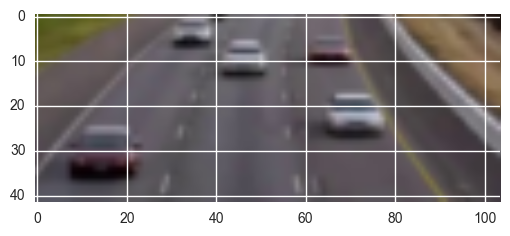

In [16]:
for (i, resized) in enumerate(pyramid(im, scale=1.5)):
    # show the resized image
    plt.imshow(imutils.opencv2matplotlib(resized))

# Image Pyramid using skimage

from skimage.transform import pyramid_gaussian

for (i, resized) in enumerate(pyramid_gaussian(im, downscale=2)):
    # if the image is too small, break from the loop
    if resized.shape[0] < 40 or resized.shape[1] < 100:
        break

    # show the resized image
    #cv2.imshow("Layer {}".format(i + 1), resized)
    #cv2.waitKey(0)
    resized=resized.astype(np.float32)
    plt.imshow(imutils.opencv2matplotlib(resized))
    

# Sliding Window

In [17]:
def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [18]:
# load the image and define the window width and height
image = cv2.resize(im,None,fx=1, fy=1, interpolation = cv2.INTER_CUBIC)    #Compressing Image
(winW, winH) = (100, 40)

In [19]:
# loop over the image pyramid

images = []
pos_windows = []

for resized in pyramid(image, scale=30):
    # loop over the sliding window for each layer of the pyramid
    for (x, y, window) in sliding_window(resized, stepSize=10, windowSize=(winW, winH)):
        # if the window does not meet our desired window size, ignore it
        if window.shape[0] != winH or window.shape[1] != winW:
            continue

        slid_win = window
        slid_win_blk = color.rgb2gray(slid_win)
        fd, hog_image = hog(slid_win_blk, orientations=6, pixels_per_cell=(10, 10),cells_per_block=(2, 2), visualise=True)
        fd = np.array(pd.DataFrame(fd.reshape(1,len(fd))))
        i += 1
                
        if model.predict(fd) == 1:
            if model.predict_proba(fd)[0][1] > 0.9:
                pos_windows.append((x, y, x + winW, y + winH))
                
    images.append(('data/video1/images1/frame1001.jpg', np.array(pos_windows)))
    pos_windows = []
    print('Akshay')

                
#         print(model.predict(fd))
#         # since we do not have a classifier, we'll just draw the window
#         clone = resized.copy()
#         cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
#         cv2.imshow("Window", clone)
#         cv2.waitKey(1)
#         time.sleep(0.00001)

# cv2.destroyAllWindows()

Akshay


# Non-Maximum Supression

In [ ]:
#  Felzenszwalb et al.
def non_max_suppression_slow(boxes, overlapThresh):
    # if there are no boxes, return an empty list
    if len(boxes) == 0:
        return []
 
    # initialize the list of picked indexes
    pick = []
 

    # grab the coordinates of the bounding boxes
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]
 
    # compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)
    
    # keep looping while some indexes still remain in the indexes
    # list
    while len(idxs) > 0:
        # grab the last index in the indexes list, add the index
        # value to the list of picked indexes, then initialize
        # the suppression list (i.e. indexes that will be deleted)
        # using the last index
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
        suppress = [last]
        
        # loop over all indexes in the indexes list
        for pos in range(0, last):
            # grab the current index
            j = idxs[pos]
 
            # find the largest (x, y) coordinates for the start of
            # the bounding box and the smallest (x, y) coordinates
            # for the end of the bounding box
            xx1 = max(x1[i], x1[j])
            yy1 = max(y1[i], y1[j])
            xx2 = min(x2[i], x2[j])
            yy2 = min(y2[i], y2[j])
 
            # compute the width and height of the bounding box
            w = max(0, xx2 - xx1 + 1)
            h = max(0, yy2 - yy1 + 1)
 
            # compute the ratio of overlap between the computed
            # bounding box and the bounding box in the area list
            overlap = float(w * h) / area[j]
 
            # if there is sufficient overlap, suppress the
            # current bounding box
            if overlap > overlapThresh:
                suppress.append(pos)
 
        # delete all indexes from the index list that are in the
        # suppression list
        idxs = np.delete(idxs, suppress)
 
    # return only the bounding boxes that were picked
    return boxes[pick]
    

In [ ]:
for (imagePath, boundingBoxes) in images:
    # load the image and clone it
    print("[x] %d initial bounding boxes" % (len(boundingBoxes)))
    image = cv2.imread(imagePath)
    orig = image.copy()
 
    # loop over the bounding boxes for each image and draw them
    for (startX, startY, endX, endY) in boundingBoxes:
        cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 0, 255), 2)
 
    # perform non-maximum suppression on the bounding boxes
    pick = non_max_suppression_slow(boundingBoxes, 0.3)
    print("[x] after applying non-maximum, %d bounding boxes" % (len(pick)))
 
    # loop over the picked bounding boxes and draw them
    for (startX, startY, endX, endY) in pick:
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
 
    # display the images
    cv2.imshow("Original", orig)
    cv2.imshow("After NMS", image)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

[x] 61 initial bounding boxes
[x] after applying non-maximum, 14 bounding boxes


# ---------------------------------------------------------------------------------

In [25]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
hog = cv2.HOGDescriptor()
im = cv2.imread('data/video1/images1/frame1000.jpg')

In [ ]:
h = hog.compute(im)

In [ ]:
cv2.HOGDescriptor()

In [170]:
import cv2

image = cv2.imread('data/video1/images1/frame1000.jpg')
#image = image[16:144,0+35:128+35]
winSize = (256,256)
blockSize = (32,32)
blockStride = (16,16)
cellSize = (16,16)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,
                        derivAperture,winSigma,histogramNormType,
                        L2HysThreshold,gammaCorrection,nlevels)


#compute(img[, winStride[, padding[, locations]]]) -> descriptors
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
hist = hog.compute(image,winStride,padding,locations)

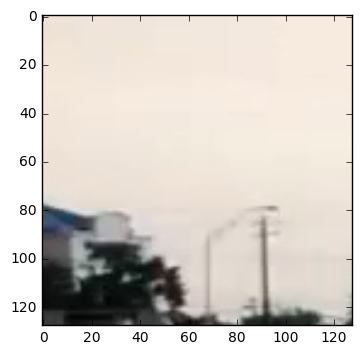

In [171]:
plt.imshow(image[16:144,35:128+35])